# Описание набора данных

Данные содержат информацию об **астрофизических обьектах**, которые претендуют на звание пульсаров. Данные о кандидатах были получены по наблюдениям в Южном полушарии путем обзора с высоким временным разрешением. **Пульсары**  - это вращающиеся нейтронные звёзды с магнитным полем, которое наклонено к оси вращения, они являются источником радиоизлучений, пульсирующих на постоянной частоте.

Данные описываются **9** признаками, из которых 8 непрерывных величин и одна переменная, описывающая принадлежность к классу (0 или 1). Первые четыре предиктора представляют собой статистические данные, полученные из **интегрированного профиля импульса объекта**, они описывают версию сигнала с разрешением по долготе, который был усреднен по времени и по частоте. 

**Интегрированный профиль импульса**: Каждый пульсар создает уникальную картину импульсного излучения, известную как его профиль импульса. Это как отпечаток пальца пульсара. Пульсары можно идентифицировать по их импульсному профилю. Но профиль импульса незначительно меняется в со временем. Это затрудняет обнаружение пульсара. Это происходит потому, что их сигналы неоднородны и не совсем стабильны в течение долгого времени. Однако эти профили становятся стабильными при усреднении за многие тысячи оборотов.

Оставшиеся четыре переменные - это аналогично полученные из **DM-SNR кривой** статистические характеристики. (**DM** (Dispersion Measure) - **мера дисперсии**, т.е. плотность столба свободных электронов между наблюдателем и пульсаром, интегрированная вдоль луча зрения. Степень рассеяния сигнала неизвестного пульсара не может быть известна априори, поэтому для определения этого значения необходимо провести несколько тестов измерения дисперсии. **SNR** (Signal-to-Noise Ratio) - **отношение сигнал-шум**).

**Кривая DM-SNR**: Радиоволны, испускаемые пульсарами, достигают земли после прохождения больших расстояний в космосе, заполненном свободными электронами. Поскольку радиоволны являются электромагнитными по своей природе, они взаимодействуют с этими электронами, это взаимодействие приводит к замедлению волны. Важным моментом является то, что пульсары излучают широкий диапазон частот, и величина, на которую электроны замедляют волну, зависит от частоты. Волны с более высокой частотой замедляются меньше по сравнению с волнами более высокой частоты. т.е. более низкие частоты достигают телескопа позже, чем более высокие частоты. Это и называется дисперсией.

Краткое описание признаков:

Признак  | Описание
-------------------|--------------------
MIP | **Mean** of the integrated profile - среднее значение интегр. профиля
STDIP | **Standard deviation** of the integrated profile - стандартное отклонение интегр. профиля
EKIP | **Excess kurtosis** of the integrated profile - эксцесс интегр. профиля
SIP | **Skewness** of the integrated profile - скошенность, ассиметрия интегр. профиля
MC | **Mean** of the DM-SNR curve - среднее значение DM-SNR кривой
STDC | **Standard deviation** of the DM-SNR curve - стандартное отклонение DM-SNR кривой
EKC | **Excess kurtosis** of the DM-SNR curve - эксцесс DM-SNR кривой
SC | **Skewness** of the DM-SNR curve - скошенность, ассиметрия DM-SNR кривой
TG | **Target Column (Class)** - принадлежность к классу пульсаров (0 - не принадлежит, 1 - принадлежит)

Эксцесс и скошенность как статистические характеристики строятся на основе четвертого и третьего центральных моментов распределения соответственно.

# Загрузка и предварительная обработка 

Импортируем необходимые библиотеки для анализа и визуализации данных

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from prettytable import PrettyTable

Подключаем Google-диск и переходим в директорию с нужным нам csv-файлом

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Data Analysis

/content/drive/MyDrive/Colab Notebooks/Data Analysis


Загружаем данные в датафрейм

In [ ]:
puls_cand = pd.read_csv("pulsar_stars_new.csv", delimiter = ",", decimal = ".")
puls_cand.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TG
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Проверим датафрейм на наличие отсутствующих значений (NULL):

In [ ]:
puls_cand.isna().sum()

MIP      0
STDIP    0
EKIP     0
SIP      0
MC       0
STDC     0
EKC      0
SC       0
TG       0
dtype: int64

Как можно заметить, NULLов в данных не обнаружено, можно работать со всем спектром значений.

Оценим основные статистики для предикторов, полученные на данном датасете:

In [ ]:
puls_cand.iloc[:,:-1].describe()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


Можно видеть достаточной большой разброс значений предикторов, от небольших отрицательных значений до тысячи как максимального значения в столбце SC, данные отличаются на 3 порядка. Поэтому перед началом работы с данными необходимо провести их стандартизацию. 

Перед началом работы с данными визуализируем пропорцию между объектами, оказавшимися пульсарами (TG = 1), и объектами, не оказавшимися пульсарами (TG = 0):

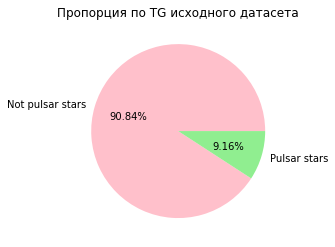

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(puls_cand['TG'].value_counts().values, labels = ['Not pulsar stars','Pulsar stars'], colors = ['pink', 'lightgreen'], autopct='%0.2f%%')
plt.title('Пропорция по TG исходного датасета')
plt.show()

Таким образом, получаем, что в исходном датасете около 91% объектов не являются пульсарами, и только ~9% составляют пульсары.

Более того, мы можем также определить какие признаки из датасета коррелируют друг с другом, визуализировав корелляционную матрицу (указываются значения коэффициентов корреляции):

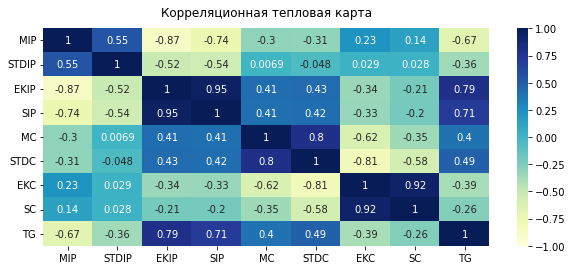

In [ ]:
plt.figure(figsize=(10, 4))
sns.heatmap(puls_cand.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.title('Корреляционная тепловая карта', fontdict={'fontsize':12}, pad=12);

Отсюда можно сделать вывод о наибольшей положительной корреляции между следующими предикторами: SIP и EKIP (коэфф. корреляции составляет 0.95), EKC и SC (коэфф. корреляции 0.92), наибольшая отрицательная корреляция наблюдаестся между MIP и EKIP (коэфф. корреляции составляет -0.87), а также EKC и STDC (коэфф. корреляции составляет -0.81). 

Еще более интересным является анализ влияния каждого из предикторов на величину TG. Как можно заметить наибольшая положительная корреляция наблюдается для предикторов EKIP (коэфф. корреляции 0.79) и SIP (коэфф. корреляции 0.71), т.е. с увеличением этих показателей увеличивается и TG, а значит большее количество объектов, зафиксированных как пульсары, имеют большие значения эксцесса и скошенности интегрального профиля. Что же касается отрициательной корреляции, то она наибольшая у предиктора MIP (коэфф. корреляции -0.67), что может свидетельствовать о том, что с уменьшением среднего значения интегрального профиля, увеличивается вероятность идентификации объекта как пульсар.

Несмотря на то, что между признаками существует явная корреляция, для построения моделей классификации мы будем использовать все предикторы, поскольку их количество невелико.

Перейдем к стандартизации предикторов, для этого используем функцию scale().

In [ ]:
st_pred_puls = pd.DataFrame(data = scale(puls_cand.iloc[:,:-1]), index = puls_cand.iloc[:,:-1].index, columns = puls_cand.iloc[:,:-1].columns)
st_pred_puls.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


Получаем датасет с стандартизированными признаками:

In [ ]:
st_puls_cand = pd.concat([st_pred_puls, puls_cand.TG], axis=1)
st_puls_cand.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TG
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438,0
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581,0
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373,0
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300,0
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794,0


# Постановка задачи и построение модели

Наша задача - провести двухклассовую классификацию астрофизических объектов по принадлежности к классу пульсаров. Для этого рассмотрим модель бэггинга деревьев принятия решений.

Обучим модель **DecisionTreeClassifier**. При этом проверим, при какой максимальной глубине дерева наш классификатор будет давать наибольшую точность.

In [ ]:
X = st_puls_cand.iloc[:,0:8].values
y = st_puls_cand.iloc[:,8].values

Разделим данные на обучающую и тестовую выборки:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Проверим точности, достигаемые на тренировочной выборке, на тестовых данных и точности при кросс-валидации для различной глубины построения дерева (глубина построения от 1 до 20):

In [ ]:
depth_values = range(1,21)
scores_data = pd.DataFrame()

In [ ]:
for depth in depth_values:
  clf = DecisionTreeClassifier(criterion='entropy', max_depth = depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
  scores = pd.DataFrame({'max_depth': [depth], 'train_score':train_score, 'test_score':test_score, 'cross_val_score': mean_cross_val_score})
  
  scores_data = scores_data.append(scores)


In [ ]:
scores_data = scores_data.set_index('max_depth')
scores_data

,train_score,test_score,cross_val_score
max_depth,,,
1,0.977730,0.976350,0.977411
2,0.977730,0.976350,0.977411
3,0.979087,0.978399,0.977810
4,0.979486,0.976350,0.977092
5,0.981801,0.977654,0.977810
6,0.983397,0.976909,0.978369
7,0.985473,0.976723,0.977411
8,0.987149,0.976536,0.976373
9,0.989384,0.974488,0.975416


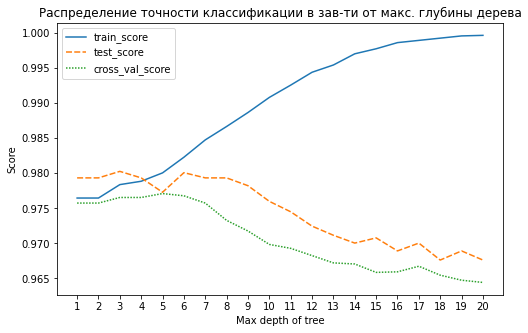

In [ ]:
plt.figure(figsize = (8,5))
sns.lineplot(data=scores_data)
plt.xticks(range(1,21)) 
plt.xlabel('Max depth of tree')
plt.ylabel('Score')
plt.title('Распределение точности классификации в зав-ти от макс. глубины дерева')
plt.show()

In [ ]:
scores_data[scores_data.cross_val_score == scores_data.cross_val_score.max()]

,train_score,test_score,cross_val_score
max_depth,,,
5,0.980045,0.977281,0.977091


Как можно видеть из графика зависимости точности классификации от максимальной глубины дерева, при глубине > 5 точность на кросс-валидации начинает падать, точность на тестовых данных еще растет и достигает максимума при глубине, равной 6. Далее эти точности начинают снижаться, соответственно точность на тренировочных данных растет, т.е., начиная с глубины равной 7, модель начинает переобучаться на тренировочных данных. И наилучшим значением максимальной глубины можно выбрать 5 или 6.

Проверим это рассуждение с помощью функции GridSearchCV, которая автоматически подбирает наилучшие параметры модели.

In [ ]:
parameters = {'criterion':['gini','entropy'],'max_depth': np.arange(1, 21)}

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(clf, parameters, cv=5)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

Определим наилучший классификатор:

In [ ]:
best_clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)

Осуществим бэггинг на таких деревьях

In [ ]:
bagging = BaggingClassifier(best_clf_tree)

In [ ]:
par_bagg = {'n_estimators' : range(1,30)}

In [ ]:
grid_bagg = GridSearchCV(bagging, par_bagg, cv=5)

In [ ]:
grid_bagg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=6)),
             param_grid={'n_estimators': range(1, 30)})

In [ ]:
grid_bagg.best_params_

{'n_estimators': 14}

Таким образом, наилучшей моделью представляется бэггинг на деревьях принятия решений с количеством деревьев - 14, где каждое дерево с максимальной глубиной - 6.

In [ ]:
best_bagg = BaggingClassifier(best_clf_tree, n_estimators = 14)

In [ ]:
best_bagg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6),
                  n_estimators=14)

Оценим точность бэггинга на тестовых данных:

In [ ]:
best_bagg.score(X_test, y_test)

0.9774674115456239

# Оценка модели и результатов

Оценим теперь такие метрики как Accuracy, Recall и F1-мера:

In [ ]:
Y_pred = best_bagg.predict(X_test)

In [ ]:
report = classification_report(y_test, Y_pred, target_names=['Not pulsar stars', 'Pulsar stars'])
print(report)

                  precision    recall  f1-score   support

Not pulsar stars       0.98      0.99      0.99      4850
    Pulsar stars       0.93      0.83      0.88       520

        accuracy                           0.98      5370
       macro avg       0.95      0.91      0.93      5370
    weighted avg       0.98      0.98      0.98      5370



Таким образом, получаем, что обученная модель классификатора почти безошибочно определяет, что звезда не является пульсаром, но может допускать ошибки при классификации к классу пульсаров, т.е. может пропускать некоторые положительные примеры (Recall 0.83). **F-мера в данном случае равна 0.88.**

Построим матрицу ошибок (Confusion Matrix) в виде:
\begin{pmatrix}
   TN & FP \\
   FN & TP 
\end{pmatrix}

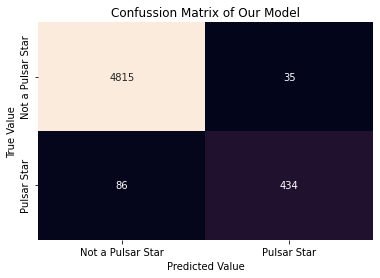

In [ ]:
label_aux = plt.subplot()
cm = confusion_matrix(y_test, Y_pred)
cm_nn = pd.DataFrame(cm, index = ['Not a Pulsar Star','Pulsar Star'], columns = ['Not a Pulsar Star','Pulsar Star'])
sns.heatmap(cm_nn, annot=True, fmt="d", cbar=False)
label_aux.set_title("Confussion Matrix of Our Model")
label_aux.set_xlabel('Predicted Value');
label_aux.set_ylabel('True Value');

Также для оценки модели построим ROC-кривую и вычислим площадь под кривой AUC:

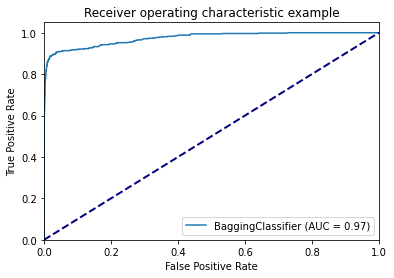

In [ ]:
RocCurveDisplay.from_estimator(best_bagg, X_test, y_test)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [ ]:
predictions = best_bagg.predict_proba(X_test)

Таким образом, получаем основные х-ки нашей модели - бэггинга деревьев принятия решений с количеством деревьев - 14, и каждое дерево с максимальной глубиной - 6:

In [ ]:
pttbl = PrettyTable()
pttbl.field_names = ["Accuracy", "Recall", "F1_Score", "AUC"]
pttbl.add_row([accuracy_score(y_test, Y_pred ),recall_score(y_test, Y_pred), 
              f1_score(y_test, Y_pred), roc_auc_score(y_test, predictions[:,1])])
print(pttbl)

+--------------------+--------------------+-------------------+--------------------+
|      Accuracy      |       Recall       |      F1_Score     |        AUC         |
+--------------------+--------------------+-------------------+--------------------+
| 0.9774674115456239 | 0.8346153846153846 | 0.877654196157735 | 0.9740880253766853 |
+--------------------+--------------------+-------------------+--------------------+


Как можно видеть, основные метрики дают нам основание полагать о хорошем качестве выбранной нами модели. Ее вполне можно использовать для последующей классификации новых наблюдаемых астрофизических объектов.